Author: Mozah Abdulrahman Alismail

## Draw Charts with R Language

### Loading Data & Explore the data

In [1]:
# Load and display a sample of student performance data

students_data <- read.csv("StudentsPerformance.csv")

head(students_data,5)

,gender,race.ethnicity,parental.level.of.education,lunch,test.preparation.course,math.score,reading.score,writing.score
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group C,some college,standard,completed,69,90,88
3,female,group B,master's degree,standard,none,90,95,93
4,male,group A,associate's degree,free/reduced,none,47,57,44
5,male,group C,some college,standard,none,76,78,75


In [2]:
# Display the dimensions of the data frame

dim(students_data)

[1] 1000    8

Note: There is are 1000 rows which represents the number of students and there are 8 colums which represent the features in our data.

In [3]:
# To make is clearer

# Number of rows (students)
row <- nrow(students_data)
paste("Number of rows (students):", as.character(row))

# Number of columns (features)
col <- ncol(students_data)
paste("Number of columns (features):", as.character(col))

[1] "Number of rows (students): 1000"

[1] "Number of columns (features): 8"

In [4]:
# Display the structure of the data frame

str(students_data)

'data.frame':	1000 obs. of  8 variables:
 $ gender                     : chr  "female" "female" "female" "male" ...
 $ race.ethnicity             : chr  "group B" "group C" "group B" "group A" ...
 $ parental.level.of.education: chr  "bachelor's degree" "some college" "master's degree" "associate's degree" ...
 $ lunch                      : chr  "standard" "standard" "standard" "free/reduced" ...
 $ test.preparation.course    : chr  "none" "completed" "none" "none" ...
 $ math.score                 : int  72 69 90 47 76 71 88 40 64 38 ...
 $ reading.score              : int  72 90 95 57 78 83 95 43 64 60 ...
 $ writing.score              : int  74 88 93 44 75 78 92 39 67 50 ...


Note: There is 5 Factors and 3 Integers in the student performance data frame.

In [5]:
# display the structure of the data frame 

summary(students_data)

    gender          race.ethnicity     parental.level.of.education
 Length:1000        Length:1000        Length:1000                
 Class :character   Class :character   Class :character           
 Mode  :character   Mode  :character   Mode  :character           
                                                                  
                                                                  
                                                                  
    lunch           test.preparation.course   math.score     reading.score   
 Length:1000        Length:1000             Min.   :  0.00   Min.   : 17.00  
 Class :character   Class :character        1st Qu.: 57.00   1st Qu.: 59.00  
 Mode  :character   Mode  :character        Median : 66.00   Median : 70.00  
                                            Mean   : 66.09   Mean   : 69.17  
                                            3rd Qu.: 77.00   3rd Qu.: 79.00  
                                            Max.   :100.00   Ma

In [6]:
# Check for missing values

missing_values <- sum(is.na(students_data))
paste("The Number of missing Data is :", as.character(missing_values))

# or for each column (more detailed) 
#missing_values <- colSums(is.na(students_data))
#missing_values

[1] "The Number of missing Data is : 0"

In [7]:
# Check for duplicated rows

duplicated_rows <- sum(duplicated(students_data))
paste("The Number of duplicated rows is :", as.character(duplicated_rows))

[1] "The Number of duplicated rows is : 0"

### Task 01: How does the performance (math, reading, and writing scores) of students vary by their gender? 

(Hint: calculate the average for each scores and groupby the result by gender and draw the result as a bar chart)

In [8]:
# Calculate the average scores for each students Function

Calculate_Average_Score <- function(students_data) {
   
    Average_Vector <- c()
    rows <- nrow(students_data)

    for (student in 1:rows) {

        # Define the scores
        math_score <- students_data$math.score[student]
        reading_score <- students_data$reading.score[student]
        writing_score <- students_data$writing.score[student]

        # Calculate the average score using R Math functions
        mean_score <- mean(c(math_score, reading_score, writing_score))

        # Add the average score to the vector
        Average_Vector <- c(Average_Vector, mean_score)
    }

    return(Average_Vector)
}

In [9]:
# Call the function and store the result in a vector
Average_Vector <- Calculate_Average_Score(students_data)

# To Check the first 5 values
"First 5 values of the Average Vector"
head(Average_Vector, 5)

# To check the length of the vector
Average_Vector_length <- length(Average_Vector)
paste("The length of the Average Vector is :", as.character(Average_Vector_length))

[1] "First 5 values of the Average Vector"

[1] 72.66667 82.33333 92.66667 49.33333 76.33333

[1] "The length of the Average Vector is : 1000"

In [10]:
# Add the average scores to the data frame
students_data_With_Average <- cbind(students_data, Average_Vector)

# Display the first 5 rows of the new data frame
head(students_data_With_Average, 5)

,gender,race.ethnicity,parental.level.of.education,lunch,test.preparation.course,math.score,reading.score,writing.score,Average_Vector
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>
1,female,group B,bachelor's degree,standard,none,72,72,74,72.66667
2,female,group C,some college,standard,completed,69,90,88,82.33333
3,female,group B,master's degree,standard,none,90,95,93,92.66667
4,male,group A,associate's degree,free/reduced,none,47,57,44,49.33333
5,male,group C,some college,standard,none,76,78,75,76.33333


In [11]:
#Grouped the Average Score by Gender using the tapply function

# Gender Factor
factor <- students_data_With_Average$gender

# Average Score Vector
vector <- students_data_With_Average$Average_Vector


# tapply is a function that applies a function to subsets of a vector
    # tapply(vector, factor, function)
    # the result is a array

AverageScore_By_Gender <- tapply(vector, factor, mean)
paste("AverageScore_By_Gender is an ", class(AverageScore_By_Gender))
AverageScore_By_Gender

[1] "AverageScore_By_Gender is an  array"

female     male 
69.56950 65.83748

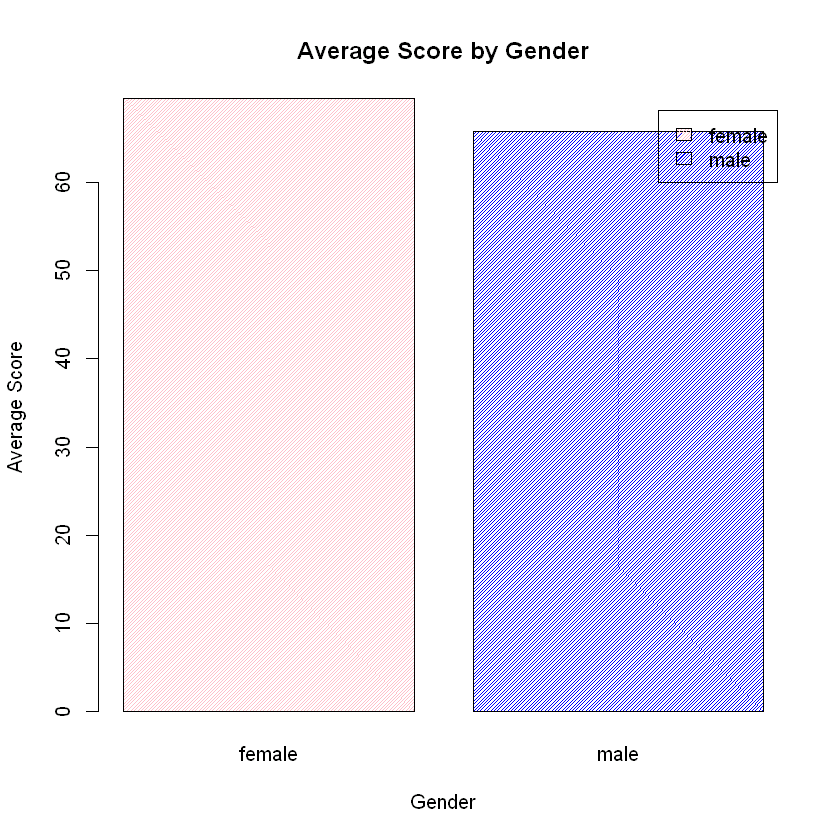

In [12]:
# Define colors for each gender
colors <- c("pink", "blue")  # Adjust as needed based on your gender levels

# Create the bar plot with average scores by gender
barplot(
    AverageScore_By_Gender,
    width = 1,
    density = 50,
    col = colors,
    legend = names(AverageScore_By_Gender),
    main = "Average Score by Gender",
    xlab = "Gender",
    ylab = "Average Score"
)

### Task 02: Does the level of parental education impact the performance of students in different subjects? 

(Hint: check the impact for each subjects)

##### Solution By Using Bar Plot

In [13]:
#Compute the Average Math Score by Test Preparation Course using the tapply function
Math_Course <- tapply(students_data$math.score, students_data$test.preparation.course, mean)

# Grouped the Reading Score by Test Preparation Course using the tapply function
Reading_Course <- tapply(students_data$reading.score, students_data$test.preparation.course, mean)

# Grouped the Writing Score by Test Preparation Course using the tapply function
Writing_Course <- tapply(students_data$writing.score, students_data$test.preparation.course, mean)

Preparation_Vs_Courses <- cbind(Math_Course, Reading_Course, Writing_Course)
Preparation_Vs_Courses

,Math_Course,Reading_Course,Writing_Course
completed,69.69553,73.89385,74.41899
none,64.07788,66.53427,64.50467


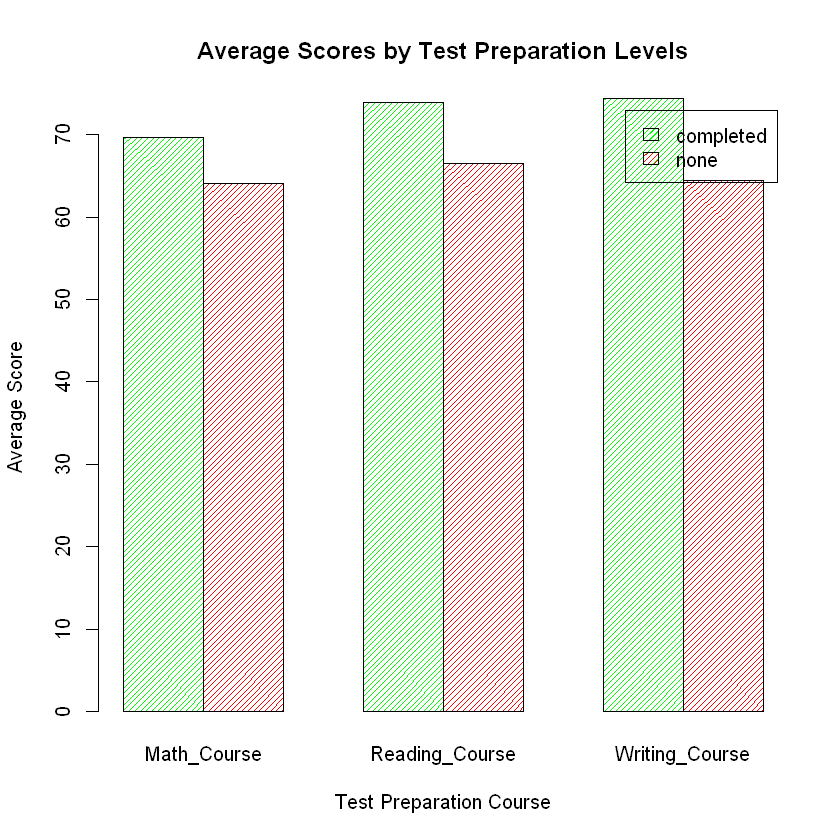

In [14]:
barplot(
    Preparation_Vs_Courses,
    beside = TRUE,
    col = c("green", "red"),
    density = 30,
    legend = rownames(Preparation_Vs_Courses),
    main = "Average Scores by Test Preparation Levels",
    xlab = "Test Preparation Course",
    ylab = "Average Score"
)

The Barplot above illustrates that the students who complete the preparation course over the Three subjects get greater average scores than the students who do not complete the preparation course.

##### Solution By Using Scatter Plot

In [15]:
# Split the data by test preparation course

# Define the variables
test_preparation <- students_data$test.preparation.course
math_score <- students_data$math.score
reading_score <- students_data$reading.score
writing_score <- students_data$writing.score

# split is a function that splits a vector into subsets
    # split(x, f)
    # x is the vector
    # f is the factor
    # the result is a list

# split the data by test preparation course
split_math_score <- split(math_score, test_preparation)
split_reading_score <- split(reading_score, test_preparation)
split_writing_score <- split(writing_score, test_preparation)

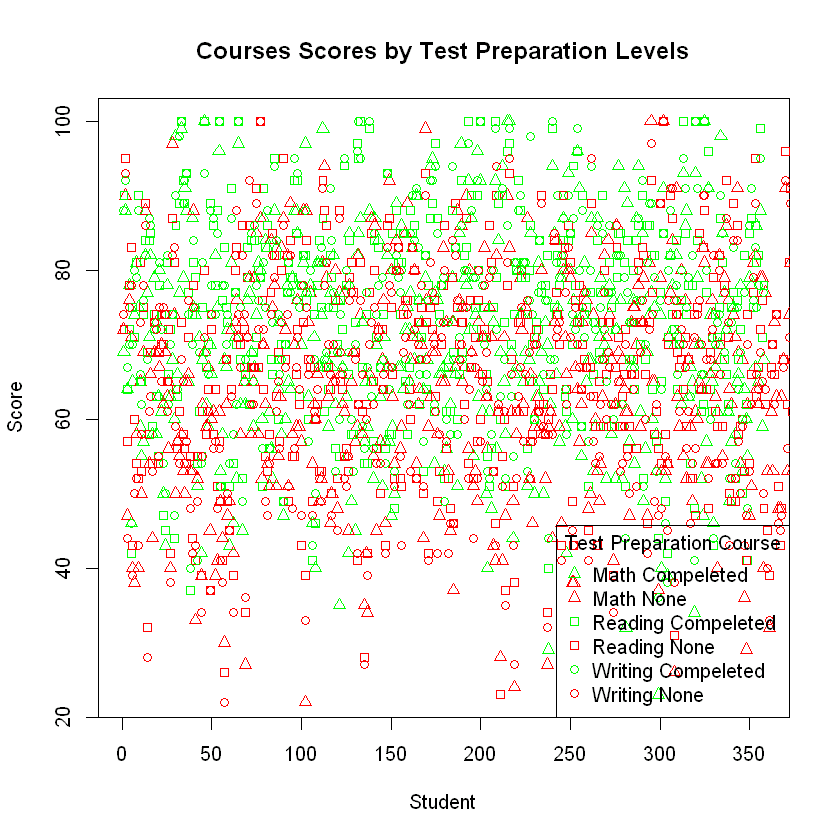

In [16]:
plot(split_math_score$completed,col = "green", pch = 24,main = "Courses Scores by Test Preparation Levels",xlab = "Student",ylab = "Score")
points(split_math_score$none,col = "red", pch = 24)
points(split_reading_score$completed,col = "green", pch = 22)
points(split_reading_score$none,col = "red", pch = 22)
points(split_writing_score$completed,col = "green", pch = 21)
points(split_writing_score$none,col = "red", pch = 21)

Legends <- c("Math Compeleted", "Math None", "Reading Compeleted", "Reading None", "Writing Compeleted", "Writing None")
Colors <- c("green", "red")
pchs <- c(24, 24, 22, 22, 21, 21)
legend("bottomright", legend = Legends, col = Colors, pch = pchs, title = "Test Preparation Course")

As Shown in the scatter plot above, the green shapes are gathered at the top and middle of the plot, which represents that: 
- the students who completed the preparation course got average and high scores 

Also, as illustrated in the graph, the red shapes are gathered at the bottom of the plot, which represents that: 
- the students who did not complete the preparation course got average and low scores

### Task 03: How do the test scores vary among students from different racial/ethnic groups?

In [17]:
# Create a data frame with the average courses scores groubed by the ethnic groups

# Define the groups:
Ethnic_Groups <- levels(students_data$race.ethnicity)

# aggregate(y ~ x, data, function)
    # y ~ x means that we want to aggregate y by x
    # data is the data frame
    # function is the function to apply
# The result is a data frame

# Calculate the average scores for each group using the aggregate function
math_scores_groupby_ethnic <- aggregate(math.score ~ race.ethnicity, students_data, mean)$math.score
reading_scores_groupby_ethnic <- aggregate(reading.score ~ race.ethnicity, students_data, mean)$reading.score
writing_scores_groupby_ethnic <- aggregate(writing.score ~ race.ethnicity, students_data, mean)$writing.score

# Create the data frame to combine the results
courses_groupby_ethnic <- rbind(math_scores_groupby_ethnic, reading_scores_groupby_ethnic, writing_scores_groupby_ethnic)
courses_groupby_ethnic

math_scores_groupby_ethnic,61.62921,63.45263,64.46395,67.36260,73.82143
reading_scores_groupby_ethnic,64.67416,67.35263,69.10345,70.03053,73.02857
writing_scores_groupby_ethnic,62.67416,65.60000,67.82759,70.14504,71.40714


In [18]:
# Add row and column names to the matrix
colnames(courses_groupby_ethnic) <- Ethnic_Groups # Groups
rownames(courses_groupby_ethnic) <- c("Math Avg Scores", "Reading Avg Scores", "Writing Avg Scores") # Courses
courses_groupby_ethnic

Math Avg Scores,61.62921,63.45263,64.46395,67.36260,73.82143
Reading Avg Scores,64.67416,67.35263,69.10345,70.03053,73.02857
Writing Avg Scores,62.67416,65.60000,67.82759,70.14504,71.40714


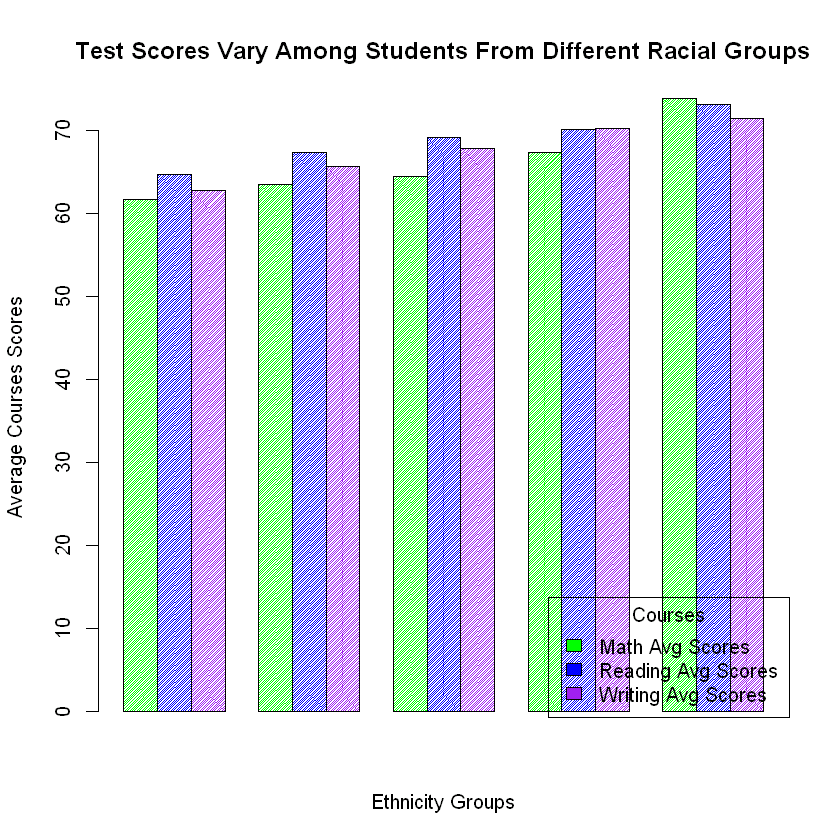

In [19]:
colors <- c("green", "blue", "purple")

barplot(
    courses_groupby_ethnic,
    beside = TRUE,
    col = colors,
    density = 70,
    main = "Test Scores Vary Among Students From Different Racial Groups",
    xlab = "Ethnicity Groups",
    ylab = "Average Courses Scores"
)

legend("bottomright", legend = rownames(courses_groupby_ethnic), fill = colors, title = "Courses")

The graph above is a bar chart which illustrate the how do the test scores vary among students from different racial/ethnic groups.

- The x axis shows the Ethnicity Groups
- The y axis shows the average courses scoures

Observations:
- The average courses scourse are increase repidlly from Group A till Group E
- Group A has the lowies average courses scours
- Group E has the highies average courses scours
- The Groups A, B and C have better scores in reading course than math and writing courses.
- Group E have better scores in math course than reading and writing courses.
